# 311 Systems report


[*311 complaint dataset*](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
[*PLUTO dataset for housing*](https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-PLUTO-/xuk2-nczf). 
 

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

### What Is the Relationship between Housing Characteristics and Complaints?
#### Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?



You also need to read back the PLUTO dataset from Cloud Object Store that you saved previously in the course. Use the PLUTO dataset for the borough that you already identified to focus on the last exercise.Ensure that you use only a limited number of fields from the dataset so that you are not consuming too much memory during your analysis.

The recommended fields are Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.

At the end of this exercise, you should determine whether the type of complaint that you have identified as the response to Question 1 has an obvious relationship with any particular characteristic or characteristics of the houses.


In [171]:
# Import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime
# Ensure the randomness is the same
np.random.seed(0)


In [172]:
# Import Complaint Data
df_complaints = pd.read_csv("./fhrw-4uyv.csv", parse_dates=False)
df_complaints.columns

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')

In [173]:
# Import Burrow Data for the Bronx & Brooklyn
BK_DF = pd.read_csv('./PLUTO_for_WEB/BK_18v1.csv')
BX_DF = pd.read_csv('./PLUTO_for_WEB/BX_18v1.csv')
MN_DF = pd.read_csv('./PLUTO_for_WEB/MN_18v1.csv')
QN_DF = pd.read_csv('./PLUTO_for_WEB/QN_18v1.csv')
SI_DF = pd.read_csv('./PLUTO_for_WEB/SI_18v1.csv')


/Users/kealanclarke/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/kealanclarke/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/kealanclarke/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/kealanclarke/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,20,22,23,64,65,77) have mixed types

In [174]:
# Combine the Dataframes and only keep relevant info
columns_in_use = ['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']
df_grouped = pd.concat([BK_DF[columns_in_use],BX_DF[columns_in_use],QN_DF[columns_in_use],MN_DF[columns_in_use]])
# df_grouped = pd.concat([BK_DF[columns_in_use],BX_DF[columns_in_use]])
df_grouped.columns

Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord'],
      dtype='object')

### Drop Na Values and also consolidate the heat/hot water to help with correlations. Also drop irrelevant information for this anaylsis for the df_complaints i.e. Resolution description, Closed Date, Created Date

In [175]:
# Drop na values as they won't help in annaylasis of pearsons correlcation
df_grouped = df_grouped.dropna()
print(df_grouped.shape)
df_complaints.head(5)

(718872, 20)


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-11-24T14:33:45.000,45007043,PAINT/PLASTER,10032.0,900 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.838127,-73.946517,NaN,RESIDENTIAL BUILDING,Open
1,2019-11-24T10:57:23.000,45008315,HEAT/HOT WATER,11206.0,435 BUSHWICK AVENUE,BUSHWICK AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.702428,-73.937188,NaN,RESIDENTIAL BUILDING,Open
2,2019-11-24T12:47:05.000,45006277,ELECTRIC,11226.0,447 EAST 26 STREET,EAST 26 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.639385,-73.952229,NaN,RESIDENTIAL BUILDING,Open
3,2019-11-24T16:51:35.000,45009473,HEAT/HOT WATER,11218.0,569 CONEY ISLAND AVENUE,CONEY ISLAND AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.643414,-73.969980,NaN,RESIDENTIAL BUILDING,Open
4,2019-11-24T10:33:15.000,45005910,WATER LEAK,10459.0,1107 BRYANT AVENUE,BRYANT AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.826453,-73.888833,NaN,RESIDENTIAL BUILDING,Open


In [176]:
df_complaints['complaint_type'] = np.where(df_complaints['complaint_type']=='HEATING','HEAT/HOT WATER',df_complaints['complaint_type'])
df_complaints = df_complaints.drop(["resolution_description","closed_date"],axis=1)
print(df_complaints["complaint_type"].value_counts())
df_complaints.head(5)

HEAT/HOT WATER            2087533
PLUMBING                   707082
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       445325
PAINT - PLASTER            361257
PAINT/PLASTER              343931
ELECTRIC                   305464
NONCONST                   260890
DOOR/WINDOW                202785
WATER LEAK                 190955
GENERAL                    149116
FLOORING/STAIRS            136460
APPLIANCE                  111411
HPD Literature Request      52830
SAFETY                      50854
OUTSIDE BUILDING             7090
ELEVATOR                     6591
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric                        1
Name: complain

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,borough,latitude,longitude,location_type,status
0,2019-11-24T14:33:45.000,45007043,PAINT/PLASTER,10032.0,900 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,MANHATTAN,40.838127,-73.946517,RESIDENTIAL BUILDING,Open
1,2019-11-24T10:57:23.000,45008315,HEAT/HOT WATER,11206.0,435 BUSHWICK AVENUE,BUSHWICK AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.702428,-73.937188,RESIDENTIAL BUILDING,Open
2,2019-11-24T12:47:05.000,45006277,ELECTRIC,11226.0,447 EAST 26 STREET,EAST 26 STREET,ADDRESS,BROOKLYN,BROOKLYN,40.639385,-73.952229,RESIDENTIAL BUILDING,Open
3,2019-11-24T16:51:35.000,45009473,HEAT/HOT WATER,11218.0,569 CONEY ISLAND AVENUE,CONEY ISLAND AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.643414,-73.969980,RESIDENTIAL BUILDING,Open
4,2019-11-24T10:33:15.000,45005910,WATER LEAK,10459.0,1107 BRYANT AVENUE,BRYANT AVENUE,ADDRESS,BRONX,BRONX,40.826453,-73.888833,RESIDENTIAL BUILDING,Open


In [177]:
df_heat_hot_water = df_complaints[df_complaints['complaint_type'] == "HEAT/HOT WATER"]
df_heat_hot_water.head(10)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,borough,latitude,longitude,location_type,status
1,2019-11-24T10:57:23.000,45008315,HEAT/HOT WATER,11206.0,435 BUSHWICK AVENUE,BUSHWICK AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.702428,-73.937188,RESIDENTIAL BUILDING,Open
3,2019-11-24T16:51:35.000,45009473,HEAT/HOT WATER,11218.0,569 CONEY ISLAND AVENUE,CONEY ISLAND AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.643414,-73.969980,RESIDENTIAL BUILDING,Open
5,2019-11-24T13:41:55.000,45008993,HEAT/HOT WATER,11237.0,180 IRVING AVENUE,IRVING AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.701760,-73.919217,RESIDENTIAL BUILDING,Open
6,2019-11-24T18:14:40.000,45008369,HEAT/HOT WATER,11219.0,1541 68 STREET,68 STREET,ADDRESS,BROOKLYN,BROOKLYN,40.620917,-73.997785,RESIDENTIAL BUILDING,Open
7,2019-11-24T10:14:44.000,45009343,HEAT/HOT WATER,11420.0,133-38 132 STREET,132 STREET,ADDRESS,South Ozone Park,QUEENS,40.668972,-73.806860,RESIDENTIAL BUILDING,Open
8,2019-11-24T11:51:09.000,45005003,HEAT/HOT WATER,11372.0,75-08 35 AVENUE,35 AVENUE,ADDRESS,Jackson Heights,QUEENS,40.751113,-73.890994,RESIDENTIAL BUILDING,Open
9,2019-11-24T12:18:01.000,45006293,HEAT/HOT WATER,11207.0,25 SCHENCK AVENUE,SCHENCK AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.680731,-73.890482,RESIDENTIAL BUILDING,Open
11,2019-11-24T22:20:53.000,45009011,HEAT/HOT WATER,11230.0,1634 EAST 2 STREET,EAST 2 STREET,ADDRESS,BROOKLYN,BROOKLYN,40.609926,-73.972113,RESIDENTIAL BUILDING,Open
14,2019-11-24T11:51:12.000,45005730,HEAT/HOT WATER,11222.0,206 NASSAU AVENUE,NASSAU AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.725594,-73.944638,RESIDENTIAL BUILDING,Open
15,2019-11-24T23:10:20.000,45006414,HEAT/HOT WATER,11211.0,983 METROPOLITAN AVENUE,METROPOLITAN AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.714512,-73.936484,RESIDENTIAL BUILDING,Open


### Create a target dataframe with the uniques incident address in both complaints and the pluto datasets which were grouped (stop using ones that perhaps double ups)

In [178]:
# Create a target data frame with the uniques indicent addresses using a true false  
df_same_address = df_grouped[['Address']].isin(df_complaints['incident_address'].unique())
print(df_same_address['Address'].sum())
df_same_address = (df_same_address['Address'])
df_same_address.value_counts()

134380


False    584492
True     134380
Name: Address, dtype: int64

### Display a heatmap of Pearsons Matrix Correlation. Numbers closer to 1 or stronger in colour are onces that have a high correltion. Ones that are closer to -1 have a higer inverse correlation. 
### The ZipCode to the Y & X Cords is due to the sample size being so small as you'd expect their to be a correlation between a Zip Code(Location/Co-ordinates) and the x and y cords as they're a Location/Co-ordinates

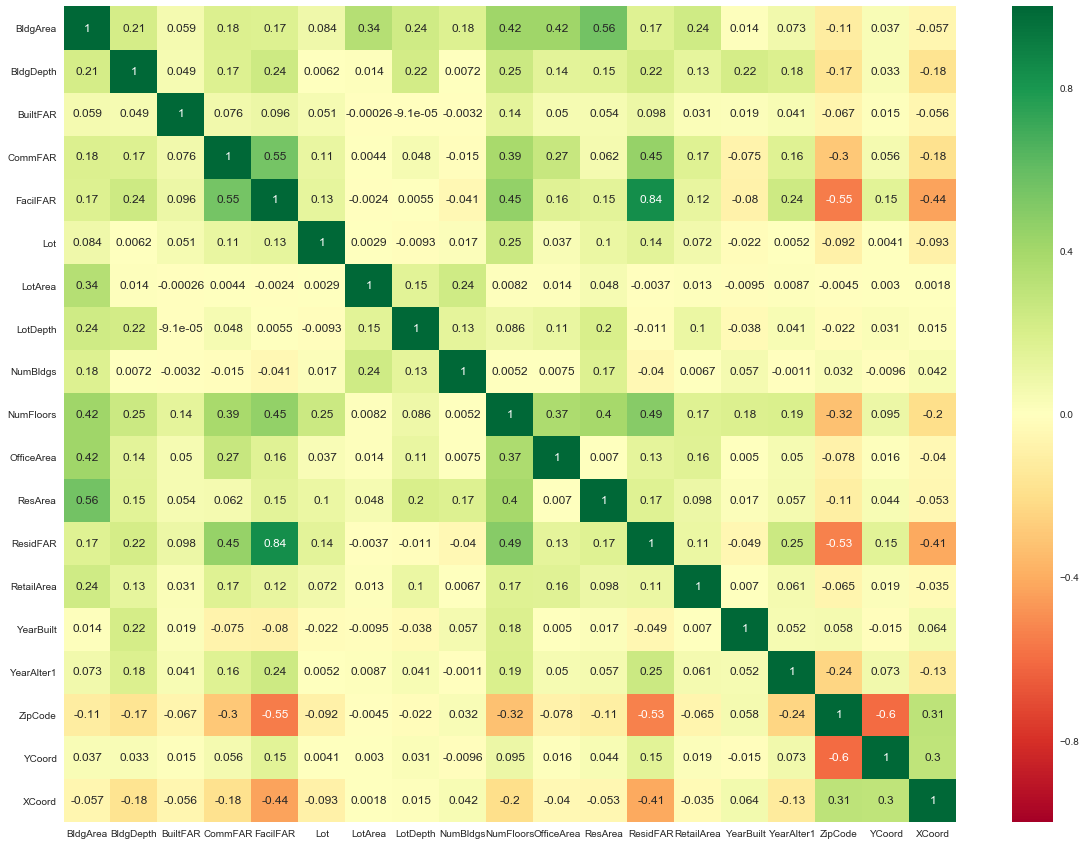

In [179]:
# Creation of a Correlation Matrix with Heatmap
plt.figure(figsize=(20,15)) 
sns.heatmap(df_grouped.corr(), annot = True, cmap="RdYlGn", linecolor='black' )
plt.show()

## Quickly print out which meet the correlation and once that reach the threshold

In [180]:
print(df_grouped.corr())

BldgArea  BldgDepth  BuiltFAR   CommFAR  FacilFAR       Lot  \
BldgArea    1.000000   0.211030  0.058708  0.183344  0.172573  0.083742   
BldgDepth   0.211030   1.000000  0.048769  0.173166  0.242758  0.006203   
BuiltFAR    0.058708   0.048769  1.000000  0.075741  0.095742  0.051257   
CommFAR     0.183344   0.173166  0.075741  1.000000  0.548952  0.111488   
FacilFAR    0.172573   0.242758  0.095742  0.548952  1.000000  0.129948   
Lot         0.083742   0.006203  0.051257  0.111488  0.129948  1.000000   
LotArea     0.337154   0.014212 -0.000262  0.004410 -0.002449  0.002868   
LotDepth    0.242161   0.223288 -0.000091  0.047589  0.005480 -0.009303   
NumBldgs    0.175147   0.007238 -0.003167 -0.014839 -0.041441  0.016738   
NumFloors   0.419060   0.253569  0.138917  0.389237  0.453273  0.252649   
OfficeArea  0.415993   0.140940  0.050007  0.267469  0.157677  0.036932   
ResArea     0.560545   0.153906  0.053803  0.062291  0.147110  0.102927   
ResidFAR    0.167044   0.216998  0.09

In [181]:
target = df_grouped.corr()
# Set threshold to be above 0.15 and below -0.15
threshold_features = target[target > 0.15]
threshold_features

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
BldgArea,1.000000,0.211030,NaN,0.183344,0.172573,NaN,0.337154,0.242161,0.175147,0.419060,0.415993,0.560545,0.167044,0.237436,NaN,NaN,NaN,NaN,NaN
BldgDepth,0.211030,1.000000,NaN,0.173166,0.242758,NaN,NaN,0.223288,NaN,0.253569,NaN,0.153906,0.216998,NaN,0.215679,0.180093,NaN,NaN,NaN
BuiltFAR,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CommFAR,0.183344,0.173166,NaN,1.000000,0.548952,NaN,NaN,NaN,NaN,0.389237,0.267469,NaN,0.452462,0.165358,NaN,0.164691,NaN,NaN,NaN
FacilFAR,0.172573,0.242758,NaN,0.548952,1.000000,NaN,NaN,NaN,NaN,0.453273,0.157677,NaN,0.839250,NaN,NaN,0.244181,NaN,0.154261,NaN
Lot,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.252649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,0.337154,NaN,NaN,NaN,NaN,NaN,1.000000,0.150415,0.240847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotDepth,0.242161,0.223288,NaN,NaN,NaN,NaN,0.150415,1.000000,NaN,NaN,NaN,0.200338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumBldgs,0.175147,NaN,NaN,NaN,NaN,NaN,0.240847,NaN,1.000000,NaN,NaN,0.172165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFloors,0.419060,0.253569,NaN,0.389237,0.453273,0.252649,NaN,NaN,NaN,1.000000,0.367764,0.397217,0.492628,0.166846,0.182403,0.191180,NaN,NaN,NaN


In [182]:
year_built = df_grouped['YearBuilt'].value_counts()

In [183]:
year_built.index

Int64Index([1920, 1930, 1925, 1910, 1950, 1940, 1960, 1931, 1901, 1935,
            ...
            1820, 1801, 1804, 1805, 1807, 1812, 1823, 1877, 1833, 2040],
           dtype='int64', length=216)

In [184]:
year_built = year_built.sort_index(0, ascending=True)

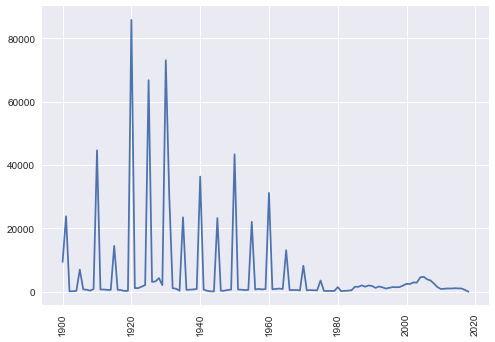

In [185]:
year_built = year_built[(year_built.index >= 1900) & (year_built.index <= 2020)]

plt.plot(year_built)
plt.xticks(rotation='vertical')
plt.show()

# This is pretty hard to read so I decided to consolidate based on decade to get an average in that era 

In [186]:
print(year_built)

1900     9439
1901    23820
1902      132
1903      177
1904      269
1905     7005
1906      746
1907      642
1908      346
1909      871
1910    44613
1911      700
1912      711
1913      570
1914      594
1915    14472
1916      638
1917      507
1918      245
1919      307
1920    85788
1921     1149
1922     1153
1923     1623
1924     2114
1925    66739
1926     3124
1927     3250
1928     4316
1929     2094
        ...  
1989     1990
1990     1816
1991     1225
1992     1666
1993     1399
1994     1003
1995     1247
1996     1474
1997     1431
1998     1484
1999     1971
2000     2506
2001     2435
2002     2947
2003     2889
2004     4556
2005     4716
2006     3917
2007     3540
2008     2558
2009     1452
2010      876
2011      946
2012     1054
2013     1023
2014     1116
2015     1060
2016     1027
2017      572
2018       14
Name: YearBuilt, Length: 119, dtype: int64


## Consolidate all into their decade to get a better idea as multiple ones appeared to be dated to just the era 1900 which made things blown out at the start of the year

In [187]:
out = {}
for index, value in enumerate(year_built):
    if year_built.index[index] % 10 == 0: 
        out[year_built.index[index]] = value
    else: 
        out[(year_built.index[index] - year_built.index[index] % 10)] += value
print(out)

{1900: 43447, 1910: 63357, 1920: 171350, 1930: 132329, 1940: 62712, 1950: 71140, 1960: 49882, 1970: 14665, 1980: 11510, 1990: 14716, 2000: 31516, 2010: 7688}


In [188]:
decade_built = pd.Series(out)

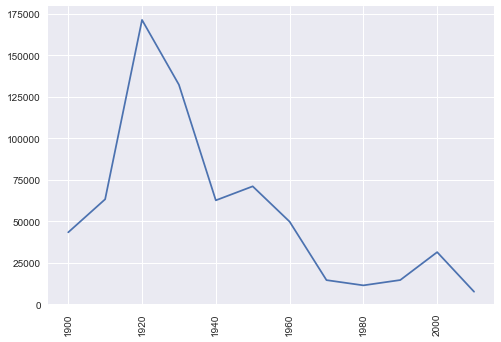

In [189]:
plt.plot(decade_built)
plt.xticks(rotation='vertical')
plt.show()

## In consolidateding by decade we can see the content a little more clearly and we can see that the 1920's has a large majority of buildings that are causing issues 

In [190]:
df_complaints = df_complaints[df_complaints["complaint_type"]  == "HEAT/HOT WATER"]
df_complaints["created_date"] = pd.to_datetime(df_complaints['created_date'], format = '%Y%m%dT%H:%M:%S.%f')
df_complaints["year"] = df_complaints["created_date"].dt.year
df_complaints["month"] = df_complaints["created_date"].dt.month
df_complaints["day"] = df_complaints["created_date"].dt.dayofweek

In [191]:
year_summ = df_complaints["year"].value_counts()
month_summ = df_complaints["month"].value_counts()
day_summ = df_complaints["day"].value_counts()

In [192]:
year_summ.sort_index(inplace=True)
month_summ.sort_index(inplace=True)
day_summ.sort_index(inplace=True)

In [193]:
month_summ.rename(index={1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "July", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"},inplace=True)
day_summ.rename(index={0 : "Sunday", 1 : "Monday", 2 : "Tuesday", 3 : "Wednesday", 4 : "Thursday", 5 : "Friday", 6 : "Saturday"},inplace=True)

In [194]:
print(year_summ, month_summ, day_summ)

2010    214218
2011    190184
2012    182974
2013    202896
2014    230364
2015    225706
2016    227959
2017    213521
2018    223835
2019    175876
Name: year, dtype: int64 Jan     457111
Feb     288816
Mar     217607
Apr     123320
May      57068
Jun      26495
July     22913
Aug      22348
Sep      24662
Oct     186302
Nov     340818
Dec     320073
Name: month, dtype: int64 Sunday       324623
Monday       312513
Tuesday      298720
Wednesday    297961
Thursday     295386
Friday       286961
Saturday     271369
Name: day, dtype: int64


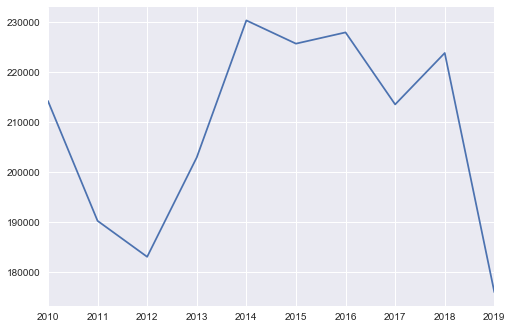

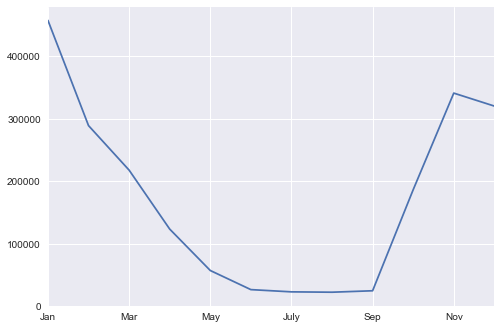

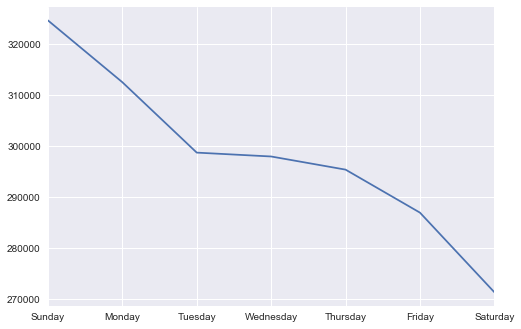

In [195]:
plt.figure(1)
year_summ.plot(kind="line")

plt.figure(2)
month_summ.plot(kind="line")

plt.figure(3)

day_summ.plot(kind="line")

plt.show()

# 311 Systems Summary - Concluding Remarks

We can see that with feature importance the largest occuring are Lot, ResArea, BuiltFAR, ZipCode & BldgArea. We can see that the Tax Block (LOT aka Tax Lot) is the highest occuring which was different from my original belief that the year built would be the correlation between housing characteristics and complaints. This shows a predicition can be made. 

We can see in the graphs just above that the highest occurring residential areas with issues are in built in the 1920's. This was the era after World War One and considered a long party and one where booming happened  and we can see other predominant buildings have issues from that time - https://macaulay.cuny.edu/seminars/lobel08/articles/b/o/o/Boom_Times_(1900-1920s)_81d3.html. As this was post world war one and pre the 1929 stock crash we had a booming time and thus a lot of buildings are being built around this time though we'd need to see other things to see why the hot water issue is predominate in these buildings. 

We can see that the majority of reporting happens around the end of the week and slowly goes down.

The months show us that the winter months as predicted have a higher uptick of reported issues